In [1]:
!pip install python-docx
import docx
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from docx import Document

In [3]:
file_path = r"C:\Users\shrik\Downloads\Diagnosis of Lung Cancer Based on CT Scans Using CNN.docx"

In [4]:
doc = Document(file_path)

In [5]:
text = ''


In [6]:
for para in doc.paragraphs:
    text += para.text + '\n'
    
print(text)

Diagnosis of Lung Cancer Based on CT Scans Using CNN

Key words: lung cancer, Convolutional neural network, CAD System, Artificial intelligence

INTRODUCTION
Lung cancer is one of the most well-known life-threatening illnesses in the globe(1). The up-to-date estimations are given by the "World Health Organization" (WHO) say that approximately 7.6 million mortality worldwide every year because of lung cancer. Furthermore, mortality due to this type of cancer is assumed to continue growing, to become almost 17 million worldwide in 2030(2, 3).
According to the statistics of “The American cancer society”, lung cancer is the head cancer killer in people in the United States.(4) The overall number of the estimated new cases of all types of cancer in 2013 was 1660290 (854790 for men and 805500 for women), the number of lung cancer was 228199 incidences (118080 for men and 110110 for women). Where the total number of estimated death cases of cancer are 580350 cases (306920 for men and 273430 f

In [7]:
from nltk.tokenize import word_tokenize, sent_tokenize 

words = word_tokenize(text) 

In [8]:
words

['Diagnosis',
 'of',
 'Lung',
 'Cancer',
 'Based',
 'on',
 'CT',
 'Scans',
 'Using',
 'CNN',
 'Key',
 'words',
 ':',
 'lung',
 'cancer',
 ',',
 'Convolutional',
 'neural',
 'network',
 ',',
 'CAD',
 'System',
 ',',
 'Artificial',
 'intelligence',
 'INTRODUCTION',
 'Lung',
 'cancer',
 'is',
 'one',
 'of',
 'the',
 'most',
 'well-known',
 'life-threatening',
 'illnesses',
 'in',
 'the',
 'globe',
 '(',
 '1',
 ')',
 '.',
 'The',
 'up-to-date',
 'estimations',
 'are',
 'given',
 'by',
 'the',
 '``',
 'World',
 'Health',
 'Organization',
 "''",
 '(',
 'WHO',
 ')',
 'say',
 'that',
 'approximately',
 '7.6',
 'million',
 'mortality',
 'worldwide',
 'every',
 'year',
 'because',
 'of',
 'lung',
 'cancer',
 '.',
 'Furthermore',
 ',',
 'mortality',
 'due',
 'to',
 'this',
 'type',
 'of',
 'cancer',
 'is',
 'assumed',
 'to',
 'continue',
 'growing',
 ',',
 'to',
 'become',
 'almost',
 '17',
 'million',
 'worldwide',
 'in',
 '2030',
 '(',
 '2',
 ',',
 '3',
 ')',
 '.',
 'According',
 'to',
 'the',


# Stopwords

In [9]:
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
words=[token for token in words if token not in stopwords_list]
print(words)

['Diagnosis', 'Lung', 'Cancer', 'Based', 'CT', 'Scans', 'Using', 'CNN', 'Key', 'words', ':', 'lung', 'cancer', ',', 'Convolutional', 'neural', 'network', ',', 'CAD', 'System', ',', 'Artificial', 'intelligence', 'INTRODUCTION', 'Lung', 'cancer', 'one', 'well-known', 'life-threatening', 'illnesses', 'globe', '(', '1', ')', '.', 'The', 'up-to-date', 'estimations', 'given', '``', 'World', 'Health', 'Organization', "''", '(', 'WHO', ')', 'say', 'approximately', '7.6', 'million', 'mortality', 'worldwide', 'every', 'year', 'lung', 'cancer', '.', 'Furthermore', ',', 'mortality', 'due', 'type', 'cancer', 'assumed', 'continue', 'growing', ',', 'become', 'almost', '17', 'million', 'worldwide', '2030', '(', '2', ',', '3', ')', '.', 'According', 'statistics', '“', 'The', 'American', 'cancer', 'society', '”', ',', 'lung', 'cancer', 'head', 'cancer', 'killer', 'people', 'United', 'States', '.', '(', '4', ')', 'The', 'overall', 'number', 'estimated', 'new', 'cases', 'types', 'cancer', '2013', '1660290

In [11]:
len(words)

1951

# Punctuation

In [12]:
from string import punctuation
words=[token for token in words if token not in punctuation]
print(words)

['Diagnosis', 'Lung', 'Cancer', 'Based', 'CT', 'Scans', 'Using', 'CNN', 'Key', 'words', 'lung', 'cancer', 'Convolutional', 'neural', 'network', 'CAD', 'System', 'Artificial', 'intelligence', 'INTRODUCTION', 'Lung', 'cancer', 'one', 'well-known', 'life-threatening', 'illnesses', 'globe', '1', 'The', 'up-to-date', 'estimations', 'given', '``', 'World', 'Health', 'Organization', "''", 'WHO', 'say', 'approximately', '7.6', 'million', 'mortality', 'worldwide', 'every', 'year', 'lung', 'cancer', 'Furthermore', 'mortality', 'due', 'type', 'cancer', 'assumed', 'continue', 'growing', 'become', 'almost', '17', 'million', 'worldwide', '2030', '2', '3', 'According', 'statistics', '“', 'The', 'American', 'cancer', 'society', '”', 'lung', 'cancer', 'head', 'cancer', 'killer', 'people', 'United', 'States', '4', 'The', 'overall', 'number', 'estimated', 'new', 'cases', 'types', 'cancer', '2013', '1660290', '854790', 'men', '805500', 'women', 'number', 'lung', 'cancer', '228199', 'incidences', '118080',

In [13]:
len(words)

1564

In [14]:
Frequency = dict() 
for i in words: 
    word = i.lower() 
    if word in Frequency: 
        Frequency[word] += 1
    else: 
        Frequency[word] = 1

In [15]:
# Creating a dictionary to keep the score 
# of each sentence 
sent = sent_tokenize(text) 
sentValue = dict() 
   
for i in sent: 
    for word, freq in Frequency.items(): 
        if word in i.lower(): 
            if i in sentValue: 
                sentValue[i] += freq 
            else: 
                sentValue[i] = freq 
   
      
sumValues = 0
for i in sentValue: 
    sumValues += sentValue[i] 

In [16]:
# Average value of a sentence from the original text 
   
average = int(sumValues / len(sentValue)) 
   
# Storing sentences into our summary. 
summary = '' 
for i in sent: 
    if (i in sentValue) and (sentValue[i] > (1.2 * average)): 
        summary += " " + i 
print(summary) 

 Diagnosis of Lung Cancer Based on CT Scans Using CNN

Key words: lung cancer, Convolutional neural network, CAD System, Artificial intelligence

INTRODUCTION
Lung cancer is one of the most well-known life-threatening illnesses in the globe(1). (4) The overall number of the estimated new cases of all types of cancer in 2013 was 1660290 (854790 for men and 805500 for women), the number of lung cancer was 228199 incidences (118080 for men and 110110 for women). Where the total number of estimated death cases of cancer are 580350 cases (306920 for men and 273430 for women), in the case of the lung cancer the number of death cases was 159480(87260 for men and 732220 for women)(5). The rate of lung cancer represents approximately 13.27% of the total cancer cases, and this shows that lung cancer is the leading type in males. For females, lung cancer not the leading cancer type, it ranked fifth between
other cancer types, in 2016 there is only 638 woman who has this disease, there are 638 wom

In [17]:
len(summary)

7346

In [18]:
len(text)

15151

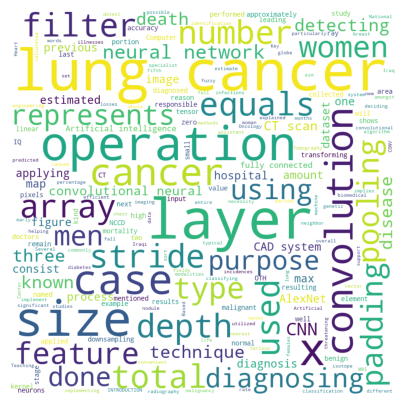

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width = 800, height = 800, background_color="white", min_font_size= 10 )

wc.generate(summary)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()
